In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report


2024-12-18 20:45:41.138419: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-18 20:45:41.141153: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-18 20:45:41.253407: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-18 20:45:41.307383: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734551141.398862  390252 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734551141.42

In [3]:
df = pd.read_csv('data.csv', sep=';', encoding='utf-8', header=None, names=['Sentence', 'Category'])

In [28]:
df

,Sentence,Category
0,Line,Category
1,اصبر قليلاً فبعد العسر تيسير وكلّ أمرٍ له وق...,الصبر
2,الأمور التي تعرفها تعادل في حجمها حفنة الرمل...,التواضع
3,البشر لن يجدوا أبر بهم ولا احنى عليهم من الل...,الرحمة
4,الحسد أغبى الرذائل إطلاقا فإنه لا يعود على ص...,الحسد
...,...,...
23873,يؤخذ العالم بالصبر.,الصبر
23874,يؤدي سوء الظن إلى الامتحان ويؤدي الامتحان إلى ...,سوء الظن
23875,يؤكد ابن خلدون هنا على حتمية العدل وتجنب الظلم...,الظلم
23876,يوم العدل على الظالم، أشد من يوم الجور على الم...,العدل


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23878 entries, 0 to 23877
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  23878 non-null  object
 1   Category  23878 non-null  object
dtypes: object(2)
memory usage: 373.2+ KB


In [30]:
category_counts = df['Category'].value_counts()
category_counts

Category
الصبر                905
الرحمة               758
الشجاعة              639
التودد               616
التغافل              589
                    ... 
الاحترام والتوقير      1
Category               1
 حسن السمت             1
جمال الروح             1
الوفاء                 1
Name: count, Length: 142, dtype: int64

In [31]:
len(category_counts)

142

In [4]:
top_categories = category_counts.nlargest(30).index

# Filter the DataFrame to include only the top 30 categories
top_df = df[df['Category'].isin(top_categories)]

# Get the count of the top 20 categories
top_counts = top_df['Category'].value_counts()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the top 20 category counts as a horizontal bar chart
ax.barh(top_counts.index, top_counts.values)

# Set the chart title and axis labels
ax.set_title('Distribution of Top 30 Categories')
ax.set_xlabel('Number of Sentences')
ax.set_ylabel('Category')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust the spacing to prevent overlapping labels
plt.subplots_adjust(left=0.3, right=0.95, top=0.9, bottom=0.1)

plt.show()

NameError: name 'category_counts' is not defined

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df['Sentence'], df['Category'], test_size=0.2, random_state=42)

In [34]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


In [35]:
max_length = max([len(x) for x in X_train_seq])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length)

In [36]:
categories = df['Category'].unique()
category_to_index = {cat: i for i, cat in enumerate(categories)}
y_train_encoded = [category_to_index[cat] for cat in y_train]
y_test_encoded = [category_to_index[cat] for cat in y_test]

In [37]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_length))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(len(categories), activation='softmax'))


/home/rami_ibrahim/miniconda3/envs/ml_project/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [40]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
y_pred = model.predict(X_test_padded)
y_pred_labels = [categories[np.argmax(pred)] for pred in y_pred]
print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))


150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step
Accuracy: 0.0037688442211055275

Classification Report:
                            precision    recall  f1-score   support

                   الحياء       0.00      0.00      0.00         2
                   الغيرة       0.00      0.00      0.00         8
               إفشاء السر       0.00      0.00      0.00        17
          الأخوة والصداقة       0.00      0.00      0.00        28
                   الألفة       0.00      0.00      0.00         9
                  الأمانة       0.00      0.00      0.00        44
        الإحسان إلى الغير       0.00      0.00      0.00         5
                  الإخلاص       0.00      0.00      0.00        20
                  الإساءة       0.00      0.00      0.00        16
                 الإساءة        0.00      0.00      0.00         2
                  الإصلاح       0.00      0.67      0.01        12
           الإطراء والمدح       0.00      0.00      0.00         1
      الإعراض عن الجاهلين    

/home/rami_ibrahim/miniconda3/envs/ml_project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rami_ibrahim/miniconda3/envs/ml_project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rami_ibrahim/miniconda3/envs/ml_project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [42]:
def predict_category(sentence):
    seq = tokenizer.texts_to_sequences([sentence])
    padded = pad_sequences(seq, maxlen=max_length)
    prediction = model.predict(padded)
    predicted_category = categories[np.argmax(prediction[0])]
    return predicted_category

Top 30 Categories:
Category
الصبر                  905
الرحمة                 758
الشجاعة                639
التودد                 616
التغافل                589
الإعراض عن الجاهلين    523
الرفق                  522
الصدق                  485
الظلم                  482
التضحية                469
البر                   465
حفظ اللسان             454
الطمع                  437
الاعتدال والوسطية      418
الوفاء                 415
النفاق                 403
التواضع                380
الكذب                  376
الشكر                  367
الغيرة                 358
القناعة                358
الحسد                  352
التثبت                 349
التأني الأناة          347
الحياء                 340
الغش                   339
السماحة                327
البطر                  313
الصمت                  308
المروءة                306
Name: count, dtype: int64
Epoch 1/20


/home/rami_ibrahim/miniconda3/envs/ml_project/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


268/268 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.1530 - loss: 3.1116 - val_accuracy: 0.6931 - val_loss: 1.3363
Epoch 2/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.7319 - loss: 1.0798 - val_accuracy: 0.8489 - val_loss: 0.7086
Epoch 3/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9001 - loss: 0.4469 - val_accuracy: 0.8582 - val_loss: 0.6185
Epoch 4/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9586 - loss: 0.2051 - val_accuracy: 0.8615 - val_loss: 0.6442
Epoch 5/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.9731 - loss: 0.1187 - val_accuracy: 0.8647 - val_loss: 0.6910
Epoch 6/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9822 - loss: 0.0777 - val_accuracy: 0.8568 - val_loss: 0.7476


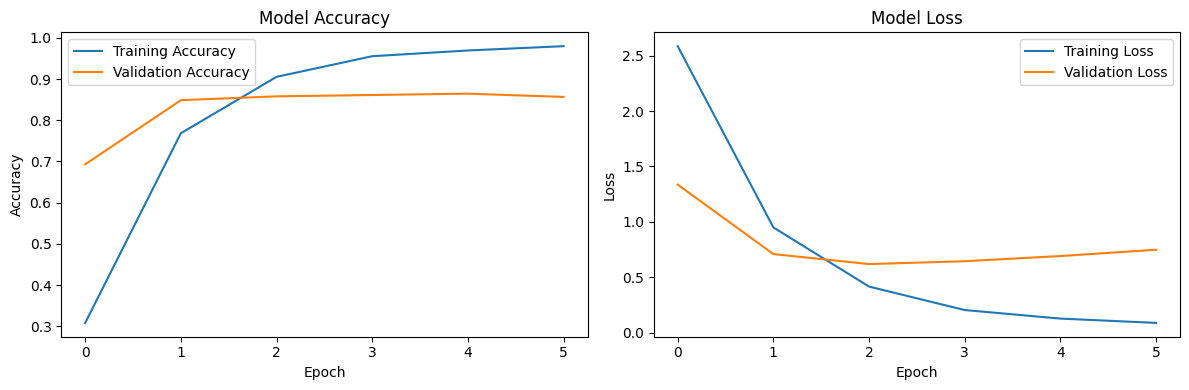

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Detailed Classification Report:
                     precision    recall  f1-score   support

              الصبر       1.00      0.99      1.00       105
             الرحمة       1.00      1.00      1.00        83
            الشجاعة       0.96      0.94      0.95        93
             التودد       0.48      0.65      0.55        63
            التغافل       0.94      0.99      0.96        69
الإعراض عن الجاهلين       0.97      0.96      0.96        70
              الرفق       0.97      0.91      0.94        94
              الصدق       0.98      0.91      0.94       118
              الظلم       0.50      0.72      0.59        76
            التضحية       1.00      0.93      0.96       123
               البر       0.93      0.77      0.84        70
         حفظ اللسان       0.77      0.81      0.79        68
              الطمع       0.90      0.88      0.89       152
  الاعتدال والوسطية       0.79      0.81      0.80       104
             

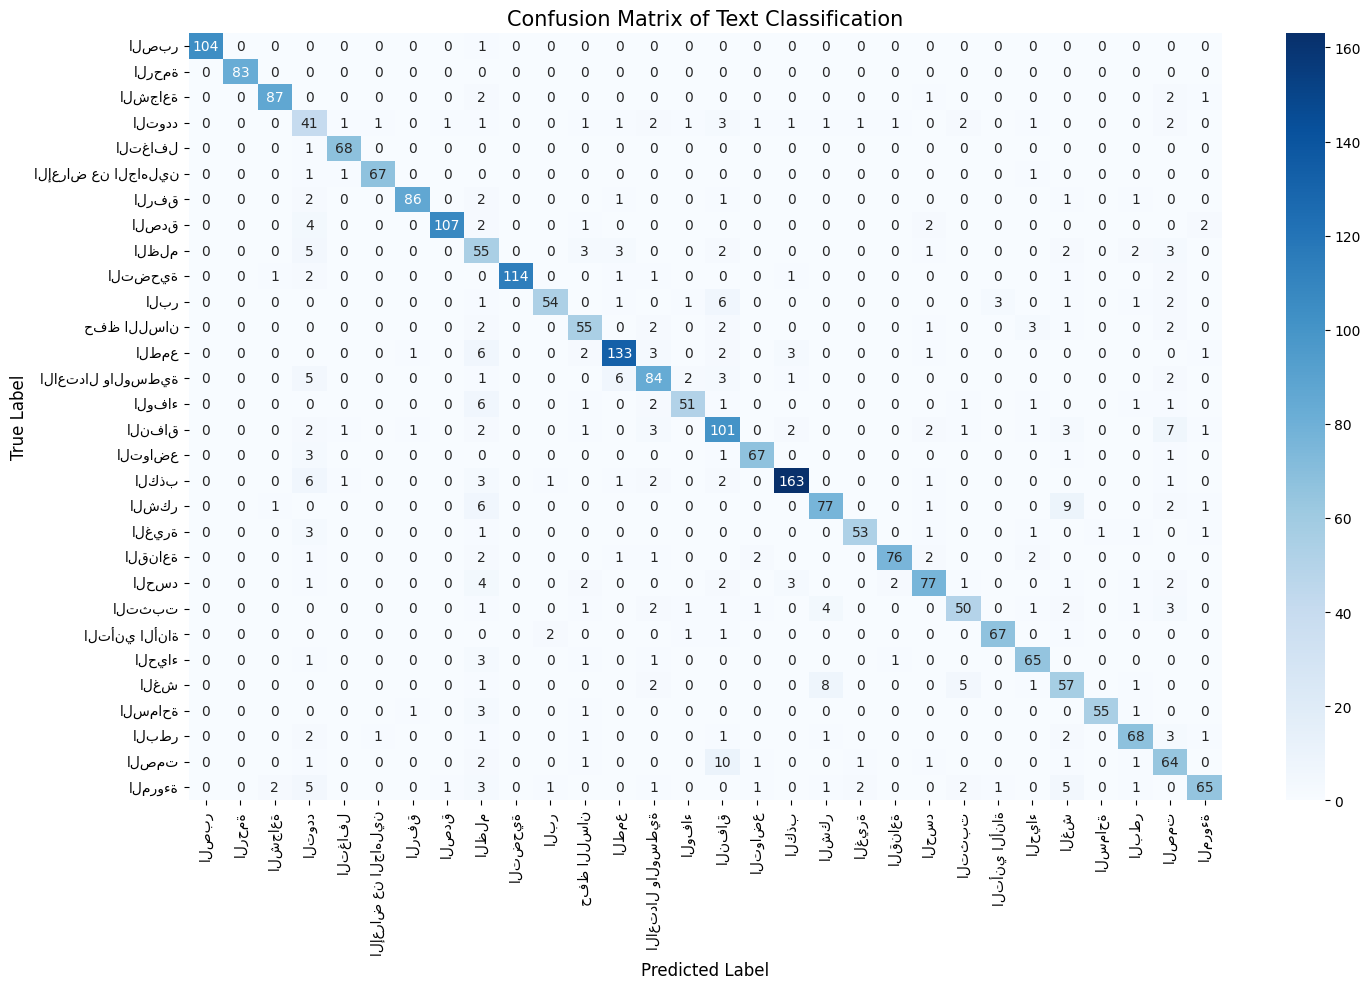


Example Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Category: الصمت


In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data.csv', sep=';', encoding='utf-8', header=None, names=['Sentence', 'Category'])

# Get top 30 categories
top_categories = df['Category'].value_counts().nlargest(30)
print("Top 30 Categories:")
print(top_categories)

# Filter dataset to include only top 30 categories
df_filtered = df[df['Category'].isin(top_categories.index)]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df_filtered['Sentence'], 
    df_filtered['Category'], 
    test_size=0.2, 
    random_state=42, 
    stratify=df_filtered['Category']
)

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_length = max([len(x) for x in X_train_seq])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Encode labels
le = LabelEncoder()
categories = top_categories.index.tolist()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Build an improved CNN model
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_length),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# Train the model with early stopping and more epochs
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

history = model.fit(
    X_train_padded, y_train_encoded, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluation function
def detailed_model_evaluation(model, X_test_padded, y_test_encoded, categories, tokenizer):
    from sklearn.metrics import classification_report, confusion_matrix
    import seaborn as sns
    
    # Predictions
    y_pred_proba = model.predict(X_test_padded)
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Classification Report
    print("Detailed Classification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=categories))
    
    # Confusion Matrix
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y_test_encoded, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, cmap='Blues')
    plt.title('Confusion Matrix of Text Classification', fontsize=15)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Prediction function
    def predict_category(sentence):
        seq = tokenizer.texts_to_sequences([sentence])
        padded = pad_sequences(seq, maxlen=max_length, padding='post', truncating='post')
        prediction = model.predict(padded)
        predicted_category = categories[np.argmax(prediction[0])]
        return predicted_category
    
    return predict_category

# Evaluate the model
predict_category = detailed_model_evaluation(model, X_test_padded, y_test_encoded, categories, tokenizer)

# Example usage of prediction
print("\nExample Prediction:")
new_sentence = "This is a great product!"
predicted_category = predict_category(new_sentence)
print("Predicted Category:", predicted_category)

## version 2

Top 30 Categories:
Category
الصبر                  905
الرحمة                 758
الشجاعة                639
التودد                 616
التغافل                589
الإعراض عن الجاهلين    523
الرفق                  522
الصدق                  485
الظلم                  482
التضحية                469
البر                   465
حفظ اللسان             454
الطمع                  437
الاعتدال والوسطية      418
الوفاء                 415
النفاق                 403
التواضع                380
الكذب                  376
الشكر                  367
الغيرة                 358
القناعة                358
الحسد                  352
التثبت                 349
التأني الأناة          347
الحياء                 340
الغش                   339
السماحة                327
البطر                  313
الصمت                  308
المروءة                306
Name: count, dtype: int64
Epoch 1/20


/home/rami_ibrahim/miniconda3/envs/ml_project/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


268/268 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.0886 - loss: 3.9650 - val_accuracy: 0.2010 - val_loss: 2.8414
Epoch 2/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.2314 - loss: 2.7391 - val_accuracy: 0.3974 - val_loss: 2.3506
Epoch 3/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.4039 - loss: 2.2550 - val_accuracy: 0.5583 - val_loss: 1.9497
Epoch 4/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.5413 - loss: 1.8046 - val_accuracy: 0.6651 - val_loss: 1.7085
Epoch 5/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.6563 - loss: 1.4961 - val_accuracy: 0.7197 - val_loss: 1.5455
Epoch 6/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7373 - loss: 1.3134 - val_accuracy: 0.7743 - val_loss: 1.4612
Epoch 7/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.8204 - loss: 1.1244 - val_accuracy: 0.7920 - val_loss: 1.3919
Epoch 8/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.8658 - loss: 0.9751 - val_accuracy: 0.80

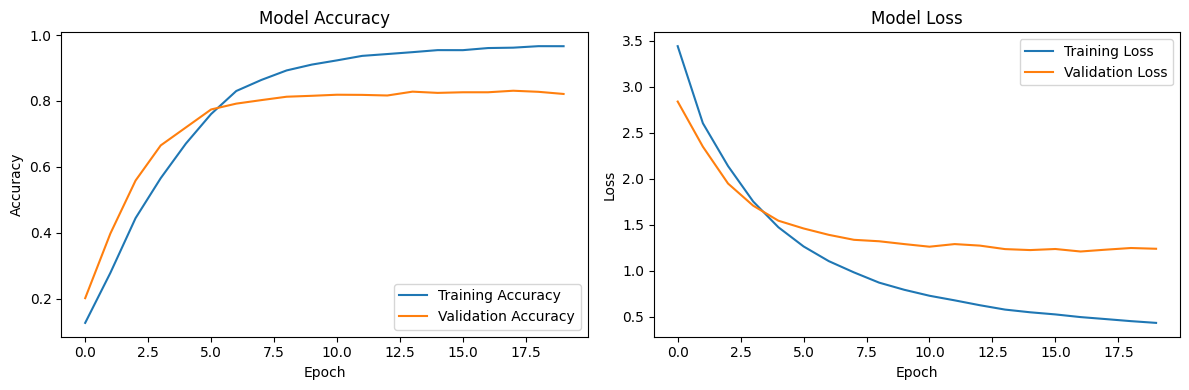

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Detailed Classification Report:
                     precision    recall  f1-score   support

              الصبر       1.00      0.98      0.99       105
             الرحمة       1.00      1.00      1.00        83
            الشجاعة       0.98      0.91      0.94        93
             التودد       0.56      0.43      0.49        63
            التغافل       0.97      0.96      0.96        69
الإعراض عن الجاهلين       0.98      0.93      0.96        70
              الرفق       0.96      0.91      0.93        94
              الصدق       0.97      0.94      0.95       118
              الظلم       0.61      0.57      0.59        76
            التضحية       0.95      0.93      0.94       123
               البر       0.75      0.64      0.69        70
         حفظ اللسان       0.70      0.81      0.75        68
              الطمع       0.86      0.88      0.87       152
  الاعتدال والوسطية       0.89      0.77      0.82       104
             

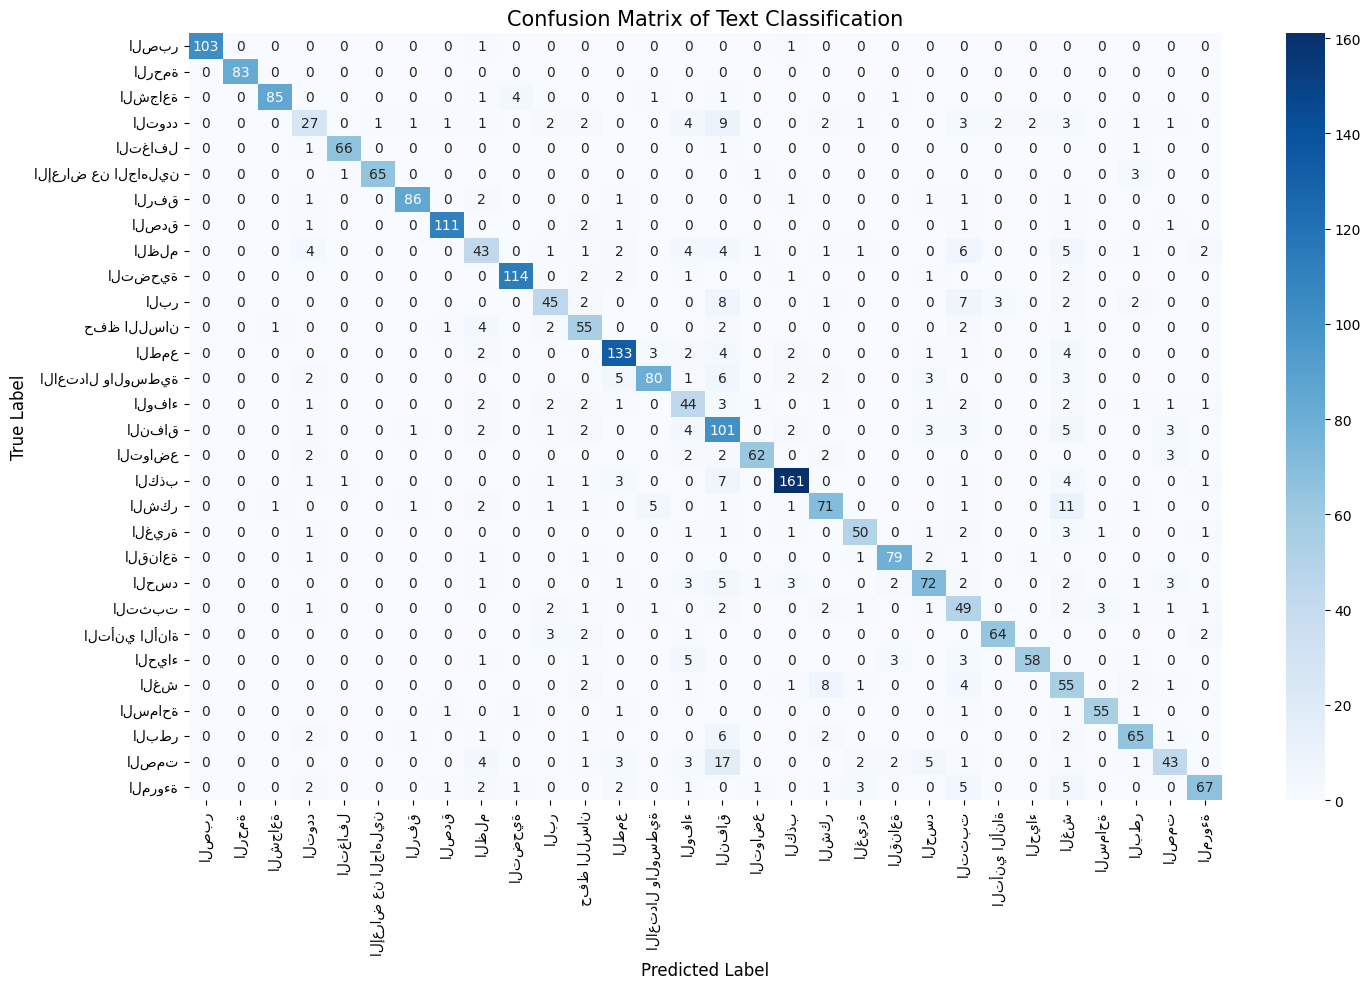


Example Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Category: النفاق


In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data.csv', sep=';', encoding='utf-8', header=None, names=['Sentence', 'Category'])

# Get top 30 categories
top_categories = df['Category'].value_counts().nlargest(30)
print("Top 30 Categories:")
print(top_categories)

# Filter dataset to include only top 30 categories
df_filtered = df[df['Category'].isin(top_categories.index)]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df_filtered['Sentence'], 
    df_filtered['Category'], 
    test_size=0.2, 
    random_state=42, 
    stratify=df_filtered['Category']
)

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_length = max([len(x) for x in X_train_seq])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Encode labels
le = LabelEncoder()
categories = top_categories.index.tolist()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Build an improved CNN model
from tensorflow.keras.regularizers import l2

model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_length),
    Conv1D(64, 5, activation='relu', kernel_regularizer=l2(0.01)),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# Train the model with early stopping and more epochs
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

history = model.fit(
    X_train_padded, y_train_encoded, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluation function
def detailed_model_evaluation(model, X_test_padded, y_test_encoded, categories, tokenizer):
    from sklearn.metrics import classification_report, confusion_matrix
    import seaborn as sns
    
    # Predictions
    y_pred_proba = model.predict(X_test_padded)
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Classification Report
    print("Detailed Classification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=categories))
    
    # Confusion Matrix
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y_test_encoded, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, cmap='Blues')
    plt.title('Confusion Matrix of Text Classification', fontsize=15)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Prediction function
    def predict_category(sentence):
        seq = tokenizer.texts_to_sequences([sentence])
        padded = pad_sequences(seq, maxlen=max_length, padding='post', truncating='post')
        prediction = model.predict(padded)
        predicted_category = categories[np.argmax(prediction[0])]
        return predicted_category
    
    return predict_category

# Evaluate the model
predict_category = detailed_model_evaluation(model, X_test_padded, y_test_encoded, categories, tokenizer)

# Example usage of prediction
print("\nExample Prediction:")
new_sentence = "This is a great product!"
predicted_category = predict_category(new_sentence)
print("Predicted Category:", predicted_category)

## version 3

Top 30 Categories:
Category
الصبر                  905
الرحمة                 758
الشجاعة                639
التودد                 616
التغافل                589
الإعراض عن الجاهلين    523
الرفق                  522
الصدق                  485
الظلم                  482
التضحية                469
البر                   465
حفظ اللسان             454
الطمع                  437
الاعتدال والوسطية      418
الوفاء                 415
النفاق                 403
التواضع                380
الكذب                  376
الشكر                  367
الغيرة                 358
القناعة                358
الحسد                  352
التثبت                 349
التأني الأناة          347
الحياء                 340
الغش                   339
السماحة                327
البطر                  313
الصمت                  308
المروءة                306
Name: count, dtype: int64
Epoch 1/20


/home/rami_ibrahim/miniconda3/envs/ml_project/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.0717 - loss: 3.7595 - val_accuracy: 0.2570 - val_loss: 2.8683
Epoch 2/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.2857 - loss: 2.6719 - val_accuracy: 0.5266 - val_loss: 2.1002
Epoch 3/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.5036 - loss: 2.0029 - val_accuracy: 0.7006 - val_loss: 1.6714
Epoch 4/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.6474 - loss: 1.5974 - val_accuracy: 0.7612 - val_loss: 1.4401
Epoch 5/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7597 - loss: 1.3170 - val_accuracy: 0.7962 - val_loss: 1.3428
Epoch 6/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.8265 - loss: 1.1029 - val_accuracy: 0.8106 - val_loss: 1.2621
Epoch 7/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8598 - loss: 0.9973 - val_accuracy: 0.8153 - val_loss: 1.2216
Epoch 8/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.8876 - loss: 0.8808 - val_accuracy: 0.818

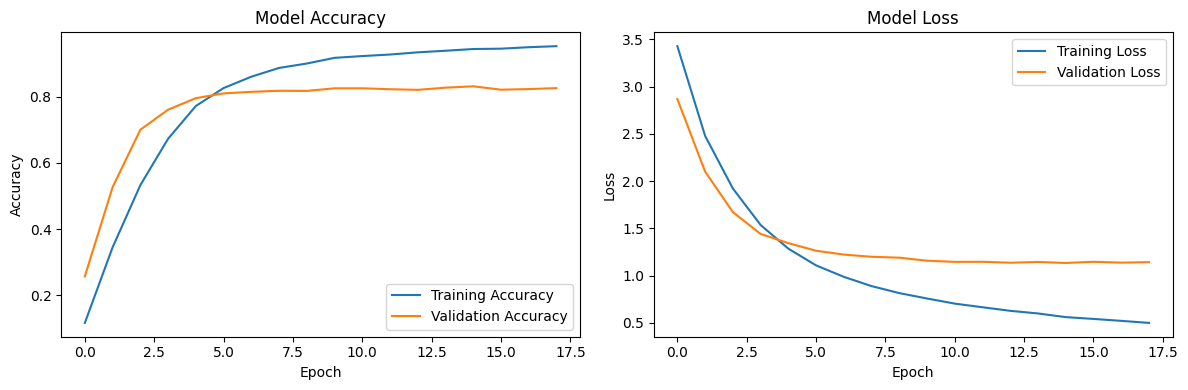

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Detailed Classification Report:
                     precision    recall  f1-score   support

              الصبر       1.00      0.98      0.99       105
             الرحمة       1.00      1.00      1.00        83
            الشجاعة       0.98      0.96      0.97        93
             التودد       0.53      0.51      0.52        63
            التغافل       0.91      0.97      0.94        69
الإعراض عن الجاهلين       0.96      0.93      0.94        70
              الرفق       0.96      0.91      0.93        94
              الصدق       0.94      0.92      0.93       118
              الظلم       0.45      0.59      0.51        76
            التضحية       0.96      0.93      0.94       123
               البر       0.80      0.67      0.73        70
         حفظ اللسان       0.71      0.84      0.77        68
              الطمع       0.84      0.89      0.87       152
  الاعتدال والوسطية       0.87      0.81      0.84       104
             

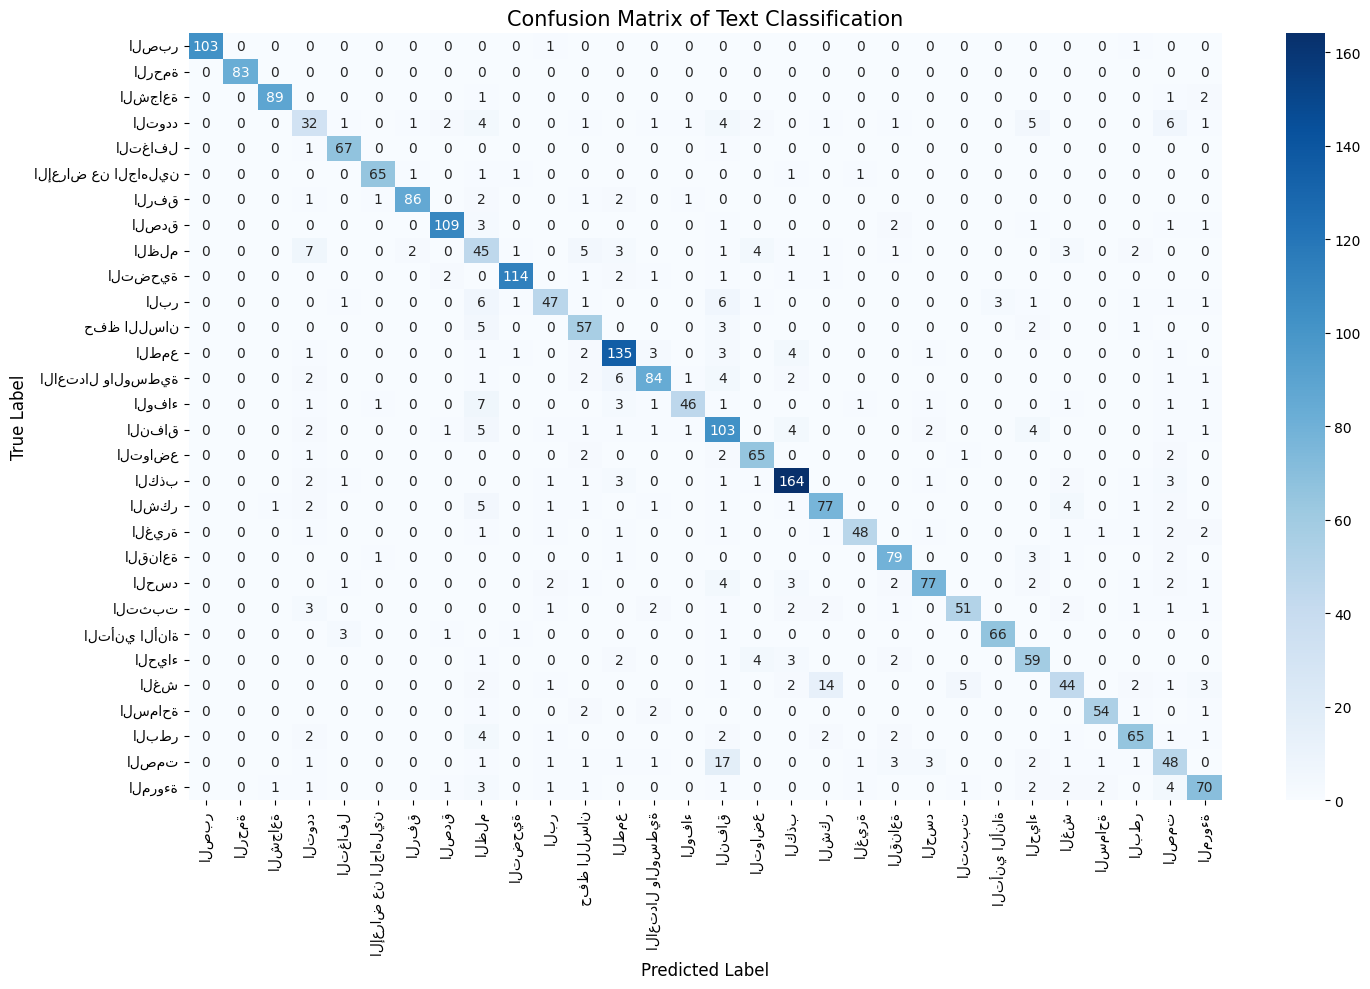


Example Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Category: النفاق


In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data.csv', sep=';', encoding='utf-8', header=None, names=['Sentence', 'Category'])

# Get top 30 categories
top_categories = df['Category'].value_counts().nlargest(30)
print("Top 30 Categories:")
print(top_categories)

# Filter dataset to include only top 30 categories
df_filtered = df[df['Category'].isin(top_categories.index)]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df_filtered['Sentence'], 
    df_filtered['Category'], 
    test_size=0.2, 
    random_state=42, 
    stratify=df_filtered['Category']
)

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_length = max([len(x) for x in X_train_seq])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Encode labels
le = LabelEncoder()
categories = top_categories.index.tolist()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Build an improved CNN model
from tensorflow.keras.regularizers import l2

model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_length),
    Conv1D(32, 3, activation='relu', kernel_regularizer=l2(0.01)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# Train the model with early stopping and more epochs
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

history = model.fit(
    X_train_padded, y_train_encoded, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluation function
def detailed_model_evaluation(model, X_test_padded, y_test_encoded, categories, tokenizer):
    from sklearn.metrics import classification_report, confusion_matrix
    import seaborn as sns
    
    # Predictions
    y_pred_proba = model.predict(X_test_padded)
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Classification Report
    print("Detailed Classification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=categories))
    
    # Confusion Matrix
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y_test_encoded, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, cmap='Blues')
    plt.title('Confusion Matrix of Text Classification', fontsize=15)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Prediction function
    def predict_category(sentence):
        seq = tokenizer.texts_to_sequences([sentence])
        padded = pad_sequences(seq, maxlen=max_length, padding='post', truncating='post')
        prediction = model.predict(padded)
        predicted_category = categories[np.argmax(prediction[0])]
        return predicted_category
    
    return predict_category

# Evaluate the model
predict_category = detailed_model_evaluation(model, X_test_padded, y_test_encoded, categories, tokenizer)

# Example usage of prediction
print("\nExample Prediction:")
new_sentence = "This is a great product!"
predicted_category = predict_category(new_sentence)
print("Predicted Category:", predicted_category)

## version 4

Top 30 Categories:
Category
الصبر                  905
الرحمة                 758
الشجاعة                639
التودد                 616
التغافل                589
الإعراض عن الجاهلين    523
الرفق                  522
الصدق                  485
الظلم                  482
التضحية                469
البر                   465
حفظ اللسان             454
الطمع                  437
الاعتدال والوسطية      418
الوفاء                 415
النفاق                 403
التواضع                380
الكذب                  376
الشكر                  367
الغيرة                 358
القناعة                358
الحسد                  352
التثبت                 349
التأني الأناة          347
الحياء                 340
الغش                   339
السماحة                327
البطر                  313
الصمت                  308
المروءة                306
Name: count, dtype: int64
Epoch 1/20


/home/rami_ibrahim/miniconda3/envs/ml_project/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.0789 - loss: 3.7854 - val_accuracy: 0.1800 - val_loss: 2.8488 - learning_rate: 0.0010
Epoch 2/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.2670 - loss: 2.6423 - val_accuracy: 0.5210 - val_loss: 2.0916 - learning_rate: 0.0010
Epoch 3/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.4691 - loss: 2.0302 - val_accuracy: 0.6012 - val_loss: 1.7233 - learning_rate: 0.0010
Epoch 4/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.5678 - loss: 1.7393 - val_accuracy: 0.6646 - val_loss: 1.5508 - learning_rate: 0.0010
Epoch 5/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.6577 - loss: 1.4961 - val_accuracy: 0.7383 - val_loss: 1.4367 - learning_rate: 0.0010
Epoch 6/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7220 - loss: 1.3164 - val_accuracy: 0.7794 - val_loss: 1.3494 - learning_rate: 0.0010
Epoch 7/20
268/268 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7795 - loss: 1.1791 - val_

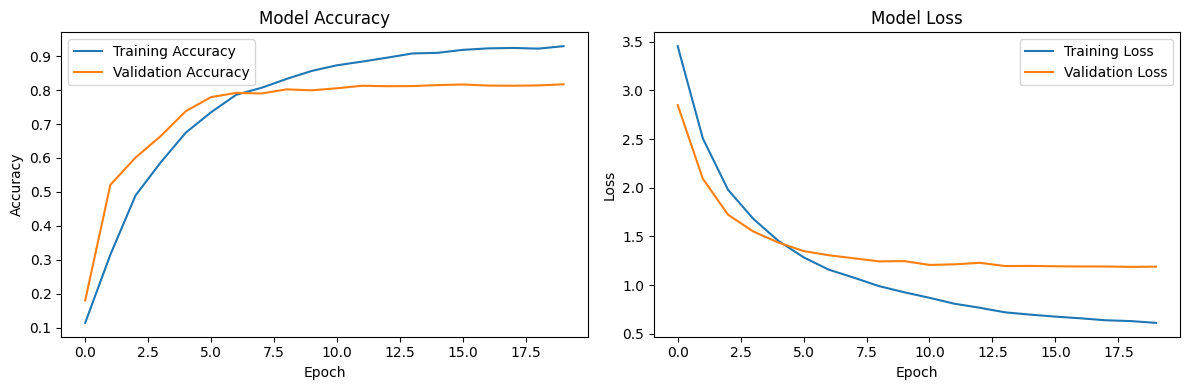

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Detailed Classification Report:
                     precision    recall  f1-score   support

              الصبر       1.00      0.97      0.99       105
             الرحمة       1.00      1.00      1.00        83
            الشجاعة       0.93      0.95      0.94        93
             التودد       0.60      0.51      0.55        63
            التغافل       0.96      0.97      0.96        69
الإعراض عن الجاهلين       1.00      0.93      0.96        70
              الرفق       0.98      0.86      0.92        94
              الصدق       0.94      0.94      0.94       118
              الظلم       0.37      0.54      0.44        76
            التضحية       1.00      0.92      0.96       123
               البر       0.76      0.71      0.74        70
         حفظ اللسان       0.69      0.76      0.73        68
              الطمع       0.85      0.88      0.86       152
  الاعتدال والوسطية       0.92      0.78      0.84       104
             

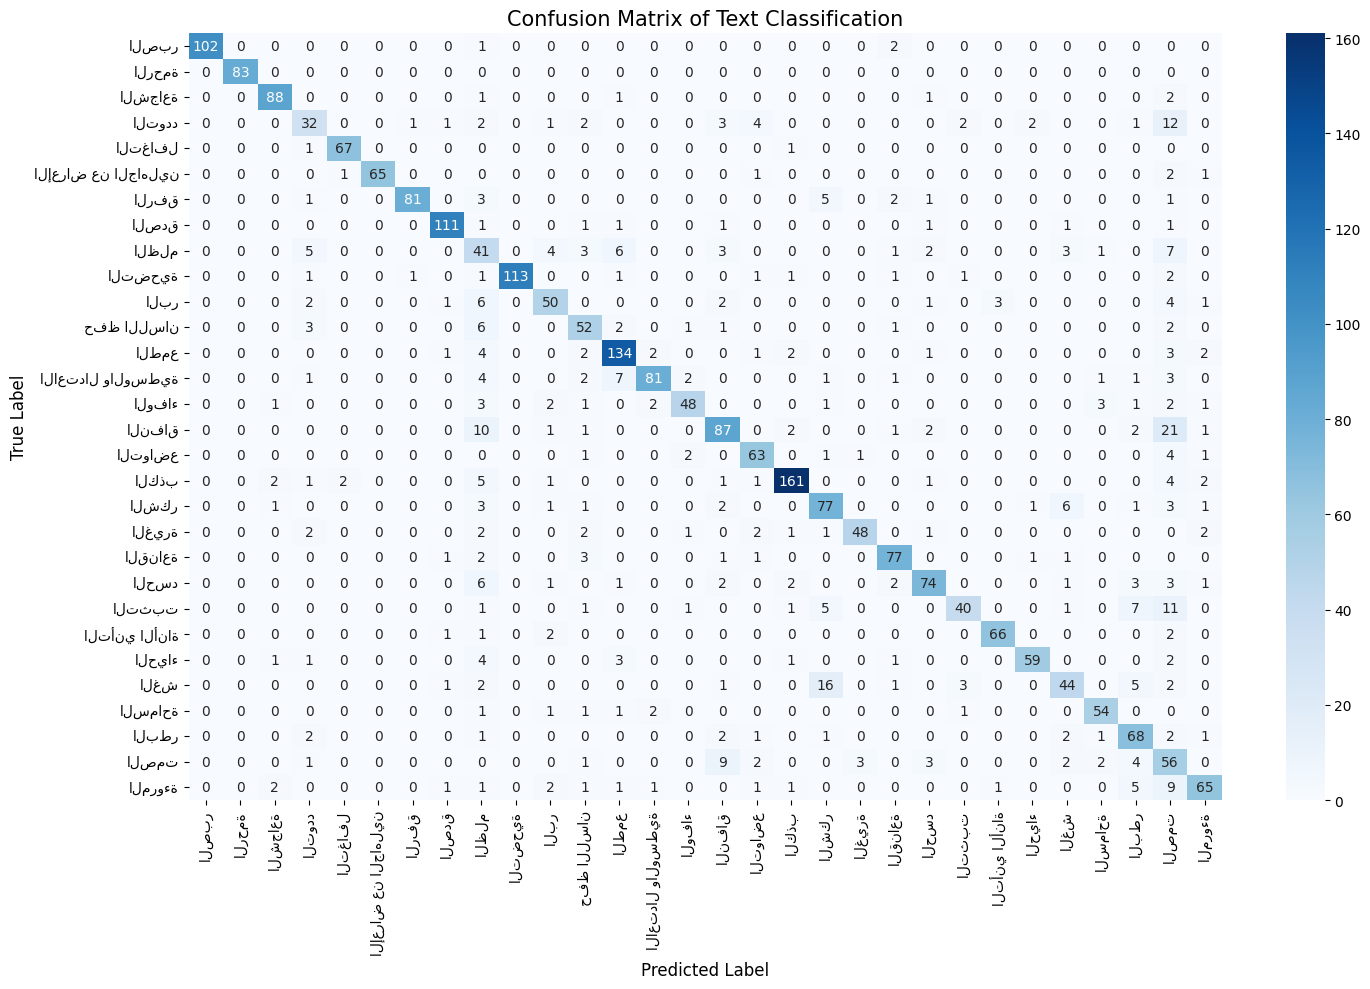


Example Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Category: الصمت


In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
df = pd.read_csv('data.csv', sep=';', encoding='utf-8', header=None, names=['Sentence', 'Category'])

# Get top 30 categories
top_categories = df['Category'].value_counts().nlargest(30)
print("Top 30 Categories:")
print(top_categories)

# Filter dataset to include only top 30 categories
df_filtered = df[df['Category'].isin(top_categories.index)]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df_filtered['Sentence'], 
    df_filtered['Category'], 
    test_size=0.2, 
    random_state=42, 
    stratify=df_filtered['Category']
)

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_length = max([len(x) for x in X_train_seq])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Encode labels
le = LabelEncoder()
categories = top_categories.index.tolist()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Build an improved CNN model
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_length),
    Conv1D(32, 3, activation='relu', kernel_regularizer=l2(0.01)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# Define callbacks: EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=2, 
    verbose=1, 
    min_lr=1e-5
)

# Train the model with callbacks
history = model.fit(
    X_train_padded, y_train_encoded, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler]
)

# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Detailed evaluation function
def detailed_model_evaluation(model, X_test_padded, y_test_encoded, categories, tokenizer):
    # Predictions
    y_pred_proba = model.predict(X_test_padded)
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Classification Report
    print("Detailed Classification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=categories))
    
    # Confusion Matrix
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y_test_encoded, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, cmap='Blues')
    plt.title('Confusion Matrix of Text Classification', fontsize=15)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Prediction function
    def predict_category(sentence):
        seq = tokenizer.texts_to_sequences([sentence])
        padded = pad_sequences(seq, maxlen=max_length, padding='post', truncating='post')
        prediction = model.predict(padded)
        predicted_category = categories[np.argmax(prediction[0])]
        return predicted_category
    
    return predict_category

# Evaluate the model
predict_category = detailed_model_evaluation(model, X_test_padded, y_test_encoded, categories, tokenizer)

# Example usage of prediction
print("\nExample Prediction:")
new_sentence = "This is a great product!"
predicted_category = predict_category(new_sentence)
print("Predicted Category:", predicted_category)


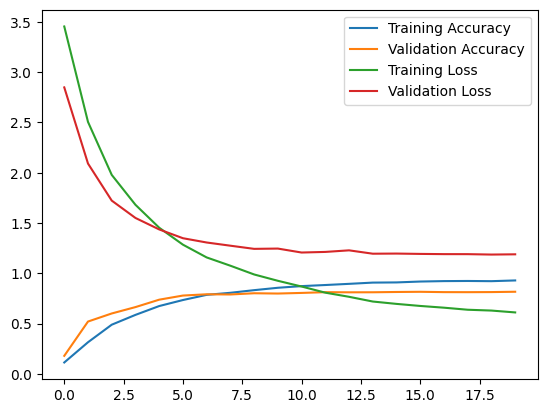

In [64]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [65]:
# Evaluate on the test data
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test_encoded)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8260 - loss: 1.2339
Test Loss: 1.2513, Test Accuracy: 0.8160


Logs saved to training_logs.csv

Training Logs:
 epoch  training_accuracy  validation_accuracy  training_loss  validation_loss
     1           0.114039             0.180037       3.454412         2.848806
     2           0.315182             0.520989       2.505620         2.091632
     3           0.489622             0.601213       1.979037         1.723279
     4           0.587220             0.664645       1.681589         1.550786
     5           0.675023             0.738340       1.453812         1.436730
     6           0.734841             0.779384       1.285285         1.349404
     7           0.786381             0.791978       1.158345         1.306773
     8           0.806786             0.790112       1.075979         1.274987
     9           0.833022             0.802239       0.989060         1.243604
    10           0.856693             0.799440       0.926116         1.246433
    11           0.873251             0.805504       0.869155         1.207096
    

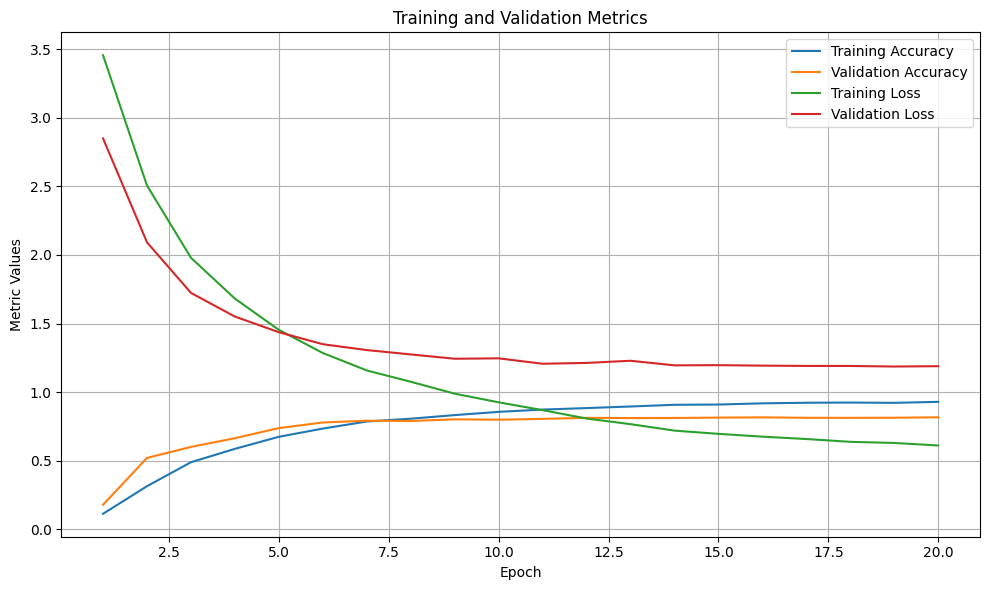

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract history data (assuming 'history' is the training object)
history_dict = history.history

# Create a DataFrame to store the metrics
history_df = pd.DataFrame({
    'epoch': range(1, len(history_dict['accuracy']) + 1),  # Epoch numbers
    'training_accuracy': history_dict['accuracy'],
    'validation_accuracy': history_dict['val_accuracy'],
    'training_loss': history_dict['loss'],
    'validation_loss': history_dict['val_loss']
})

# Save logs to CSV file
log_file = "training_logs.csv"
history_df.to_csv(log_file, index=False)
print(f"Logs saved to {log_file}")

# Print the logs in tabular format
print("\nTraining Logs:")
print(history_df.to_string(index=False))

# Plot metrics
plt.figure(figsize=(10, 6))
plt.plot(history_df['epoch'], history_df['training_accuracy'], label='Training Accuracy')
plt.plot(history_df['epoch'], history_df['validation_accuracy'], label='Validation Accuracy')
plt.plot(history_df['epoch'], history_df['training_loss'], label='Training Loss')
plt.plot(history_df['epoch'], history_df['validation_loss'], label='Validation Loss')

# Customize plot
plt.xlabel('Epoch')
plt.ylabel('Metric Values')
plt.title('Training and Validation Metrics')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## version 5

Top 30 Categories:
Category
الصبر                  905
الرحمة                 758
الشجاعة                639
التودد                 616
التغافل                589
الإعراض عن الجاهلين    523
الرفق                  522
الصدق                  485
الظلم                  482
التضحية                469
البر                   465
حفظ اللسان             454
الطمع                  437
الاعتدال والوسطية      418
الوفاء                 415
النفاق                 403
التواضع                380
الكذب                  376
الشكر                  367
الغيرة                 358
القناعة                358
الحسد                  352
التثبت                 349
التأني الأناة          347
الحياء                 340
الغش                   339
السماحة                327
البطر                  313
الصمت                  308
المروءة                306
Name: count, dtype: int64
Epoch 1/7


/home/rami_ibrahim/miniconda3/envs/ml_project/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-12-18 20:47:13.365271: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


268/268 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.0699 - loss: 3.7872 - val_accuracy: 0.2071 - val_loss: 2.9850 - learning_rate: 0.0010
Epoch 2/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.2381 - loss: 2.7906 - val_accuracy: 0.3549 - val_loss: 2.3868 - learning_rate: 0.0010
Epoch 3/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.3694 - loss: 2.2933 - val_accuracy: 0.5378 - val_loss: 2.0208 - learning_rate: 0.0010
Epoch 4/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.5140 - loss: 1.9340 - val_accuracy: 0.6595 - val_loss: 1.6805 - learning_rate: 0.0010
Epoch 5/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.6308 - loss: 1.5807 - val_accuracy: 0.7034 - val_loss: 1.5133 - learning_rate: 0.0010
Epoch 6/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7135 - loss: 1.3603 - val_accuracy: 0.7481 - val_loss: 1.4404 - learning_rate: 0.0010
Epoch 7/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.7847 - loss: 1.1624 - val_accura

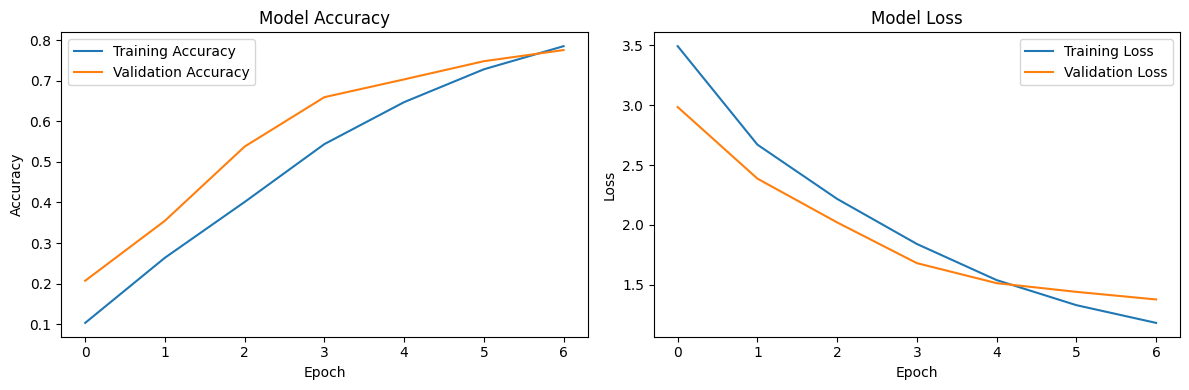

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Detailed Classification Report:
                     precision    recall  f1-score   support

              الصبر       1.00      0.97      0.99       105
             الرحمة       0.99      1.00      0.99        83
            الشجاعة       0.97      0.94      0.95        93
             التودد       0.37      0.48      0.42        63
            التغافل       0.94      0.90      0.92        69
الإعراض عن الجاهلين       1.00      0.90      0.95        70
              الرفق       0.99      0.89      0.94        94
              الصدق       0.96      0.90      0.93       118
              الظلم       0.49      0.47      0.48        76
            التضحية       1.00      0.90      0.95       123
               البر       0.89      0.67      0.76        70
         حفظ اللسان       0.90      0.69      0.78        68
              الطمع       0.91      0.87      0.89       152
  الاعتدال والوسطية       0.83      0.76      0.79       104
             

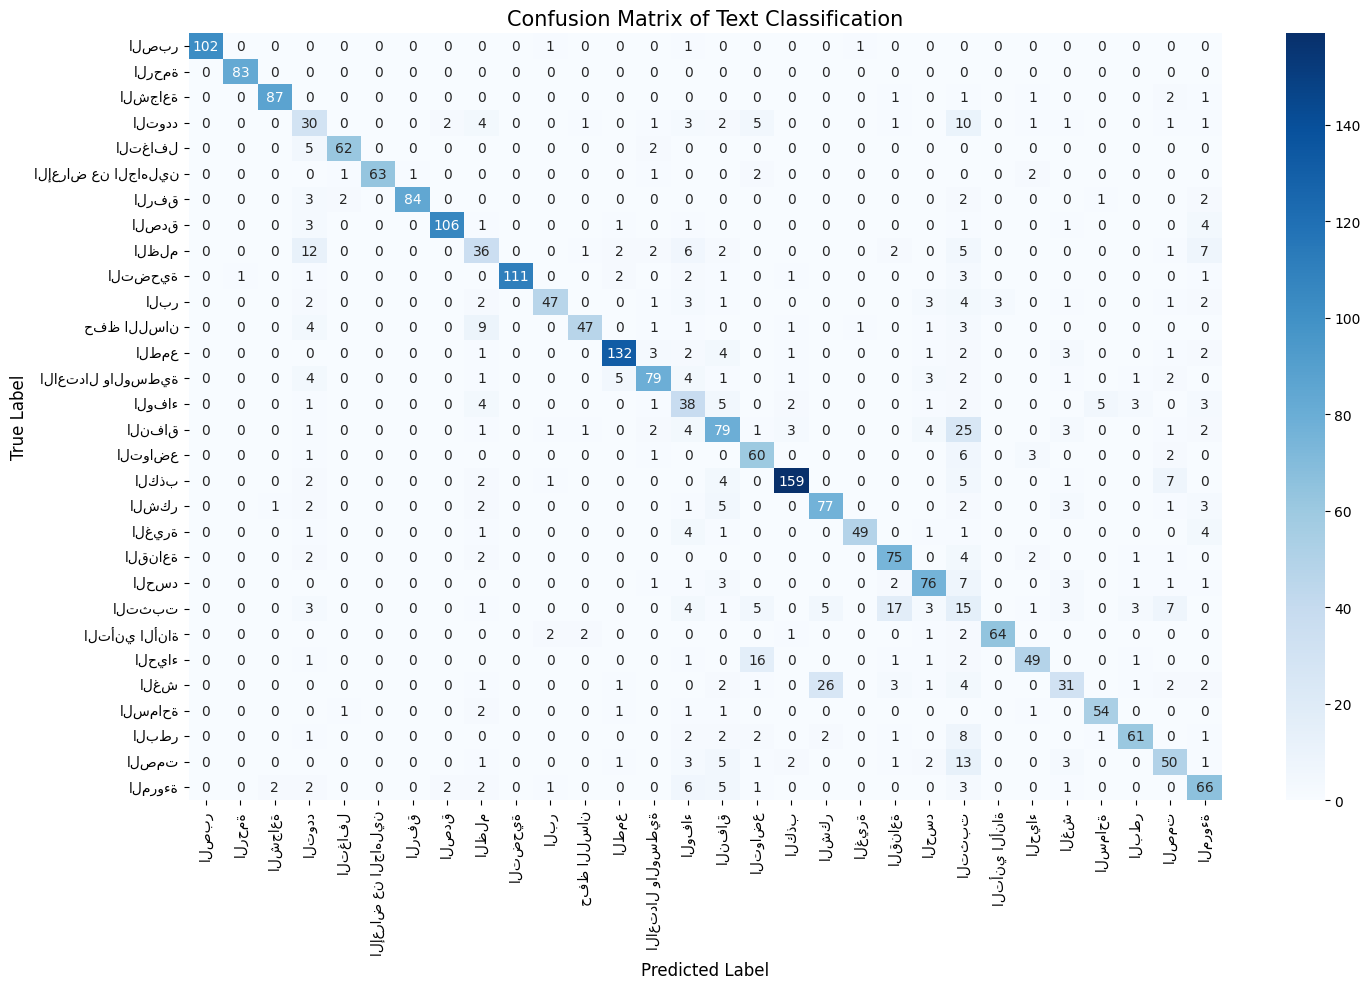


Example Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Category: التثبت


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
df = pd.read_csv('data.csv', sep=';', encoding='utf-8', header=None, names=['Sentence', 'Category'])

# Get top 30 categories
top_categories = df['Category'].value_counts().nlargest(30)
print("Top 30 Categories:")
print(top_categories)

# Filter dataset to include only top 30 categories
df_filtered = df[df['Category'].isin(top_categories.index)]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df_filtered['Sentence'], 
    df_filtered['Category'], 
    test_size=0.2, 
    random_state=42, 
    stratify=df_filtered['Category']
)

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_length = max([len(x) for x in X_train_seq])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Encode labels
le = LabelEncoder()
categories = top_categories.index.tolist()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Build an improved CNN model
model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_length),
    Conv1D(32, 3, activation='relu', kernel_regularizer=l2(0.01)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# Define callbacks: EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=2, 
    verbose=1, 
    min_lr=1e-5
)

# Train the model with callbacks
history = model.fit(
    X_train_padded, y_train_encoded, 
    epochs=7, 
    batch_size=32, 
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler]
)

# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Detailed evaluation function
def detailed_model_evaluation(model, X_test_padded, y_test_encoded, categories, tokenizer):
    # Predictions
    y_pred_proba = model.predict(X_test_padded)
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Classification Report
    print("Detailed Classification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=categories))
    
    # Confusion Matrix
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y_test_encoded, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=categories, yticklabels=categories, cmap='Blues')
    plt.title('Confusion Matrix of Text Classification', fontsize=15)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Prediction function
    def predict_category(sentence):
        seq = tokenizer.texts_to_sequences([sentence])
        padded = pad_sequences(seq, maxlen=max_length, padding='post', truncating='post')
        prediction = model.predict(padded)
        predicted_category = categories[np.argmax(prediction[0])]
        return predicted_category
    
    return predict_category

# Evaluate the model
predict_category = detailed_model_evaluation(model, X_test_padded, y_test_encoded, categories, tokenizer)

# Example usage of prediction
print("\nExample Prediction:")
new_sentence = "This is a great product!"
predicted_category = predict_category(new_sentence)
print("Predicted Category:", predicted_category)


In [77]:
# Example usage of prediction
print("\nExample Prediction:")
new_sentence = "الرفق بالحيوان هو من أسس الرحمة."
predicted_category = predict_category(new_sentence)
print("Predicted Category:", predicted_category)



Example Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Category: الاعتدال والوسطية


In [9]:
df_filtered = df[df['Category'].isin(top_categories.index)]

classes = df_filtered['Category'].unique().tolist()

classes

['الصبر',
 'التواضع',
 'الحسد',
 'الشكر',
 'التودد',
 'الظلم',
 'الصدق',
 'النفاق',
 'الكذب',
 'القناعة',
 'الرفق',
 'الغيرة',
 'الرحمة',
 'الطمع',
 'الغش',
 'حفظ اللسان',
 'الشجاعة',
 'الوفاء',
 'البطر',
 'السماحة',
 'الصمت',
 'التضحية',
 'الحياء',
 'التغافل',
 'الإعراض عن الجاهلين',
 'البر',
 'المروءة',
 'التثبت',
 'الاعتدال والوسطية',
 'التأني الأناة']